# Spinal Muscular Atrophy (SMA) – Background and Data Overview


## Day 1

## Biological Background

Spinal Muscular Atrophy (SMA) is a rare genetic disorder caused by mutations in the SMN1 gene.
It leads to degeneration of motor neurons, resulting in muscle weakness.

The number of SMN2 gene copies influences disease severity.
Patients with more SMN2 copies usually have milder symptoms.


## Dataset Description

This project uses a clinical-style dataset related to SMA patients.
The dataset includes patient age, disease type, genetic features,
and motor function scores.

Target variable: disease severity.


## Planned Data Columns

- age: Patient age in years
- sma_type: Type of SMA (I, II, III)
- smn2_copies: Number of SMN2 gene copies
- motor_score: Motor function assessment score
- severity: Disease severity level


## Day 2

In [3]:
## Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
## Loading the dataset
df = pd.read_csv("D:/My Projects/sma-data-science/data/raw/sma_clinical_data.csv")

In [5]:
## Basic Info
df.shape
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          10 non-null     int64 
 1   sma_type     10 non-null     object
 2   smn2_copies  10 non-null     int64 
 3   motor_score  10 non-null     int64 
 4   severity     10 non-null     object
dtypes: int64(3), object(2)
memory usage: 532.0+ bytes


In [6]:
## Preview Data
df.head()

,age,sma_type,smn2_copies,motor_score,severity
0,1,Type I,2,10,severe
1,2,Type I,2,12,severe
2,5,Type II,3,35,moderate
3,7,Type II,3,40,moderate
4,10,Type III,4,65,mild


In [7]:
df.tail()

,age,sma_type,smn2_copies,motor_score,severity
5,12,Type III,4,70,mild
6,4,Type II,3,38,moderate
7,9,Type III,4,68,mild
8,3,Type I,2,15,severe
9,6,Type II,3,42,moderate


In [8]:
## Basic Statistics
df.describe()

,age,smn2_copies,motor_score
count,10.00000,10.000000,10.000000
mean,5.90000,3.000000,39.500000
std,3.60401,0.816497,22.726636
min,1.00000,2.000000,10.000000
25%,3.25000,2.250000,20.000000
50%,5.50000,3.000000,39.000000
75%,8.50000,3.750000,59.250000
max,12.00000,4.000000,70.000000


## Initial Observations

- The dataset contains clinical and genetic features related to SMA patients.
- There are both numerical and categorical variables.
- The target variable is disease severity.
- No missing values are observed at this stage.


## Day 3

In [9]:
## Checking for missing values
df.isnull().sum()

age            0
sma_type       0
smn2_copies    0
motor_score    0
severity       0
dtype: int64

## Missing Value Check

No missing values are observed in the dataset.


In [10]:
## Validate Data Types
df.dtypes

age             int64
sma_type       object
smn2_copies     int64
motor_score     int64
severity       object
dtype: object

## Data Type Validation

Numerical and categorical variables are correctly represented.
No type conversion is required at this stage.


In [11]:
## Check unique values
df["sma_type"].unique()


array(['Type I', 'Type II', 'Type III'], dtype=object)

In [12]:
df["severity"].unique()


array(['severe', 'moderate', 'mild'], dtype=object)

## Category Validation

The SMA type and severity categories are consistent and meaningful.

In [13]:
## Saving the cleaned dataset
df.to_csv("D:/My Projects/sma-data-science/data/processed/sma_clinical_data_cleaned.csv", index=False)

## Day 4

In [14]:
## Loading the proceesed dataset
df_cleaned = pd.read_csv("D:/My Projects/sma-data-science/data/processed/sma_clinical_data_cleaned.csv")

In [15]:
## Descriptive Statistics of cleaned data
df_cleaned.describe()

,age,smn2_copies,motor_score
count,10.00000,10.000000,10.000000
mean,5.90000,3.000000,39.500000
std,3.60401,0.816497,22.726636
min,1.00000,2.000000,10.000000
25%,3.25000,2.250000,20.000000
50%,5.50000,3.000000,39.000000
75%,8.50000,3.750000,59.250000
max,12.00000,4.000000,70.000000


### Statistical Summary

The dataset shows variation in age, SMN2 copy number, and motor function scores.
Motor scores tend to increase with less severe disease types.


### Distribution Plots

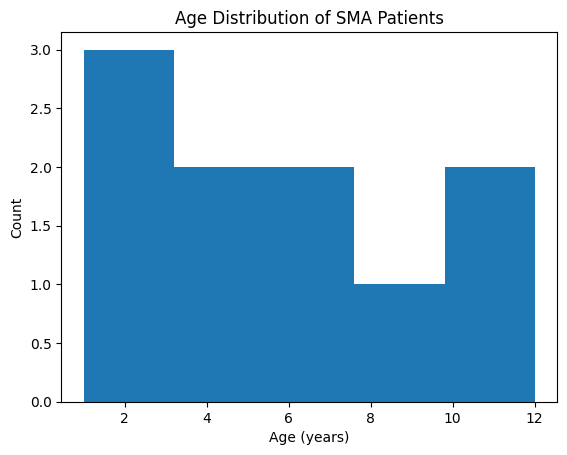

In [16]:
## Age Distribution
plt.hist(df_cleaned["age"], bins=5)
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.title("Age Distribution of SMA Patients")
plt.show()


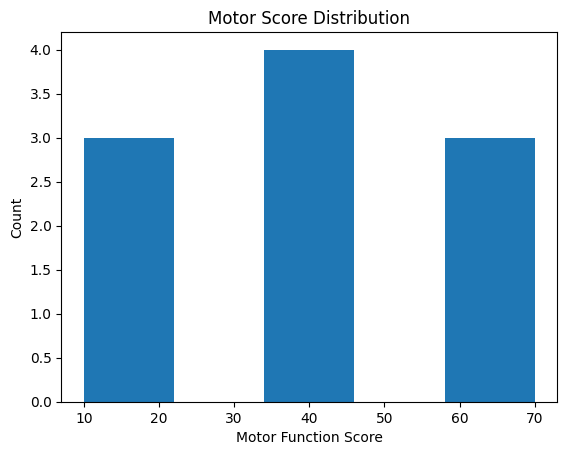

In [17]:
## Motor Score Distribution
plt.hist(df_cleaned["motor_score"], bins=5)
plt.xlabel("Motor Function Score")
plt.ylabel("Count")
plt.title("Motor Score Distribution")
plt.show()


## Biological Insights

### Biological Interpretation

Younger patients tend to have lower motor function scores,which aligns with more severe SMA types.
Higher motor scores are associated with milder disease severity.


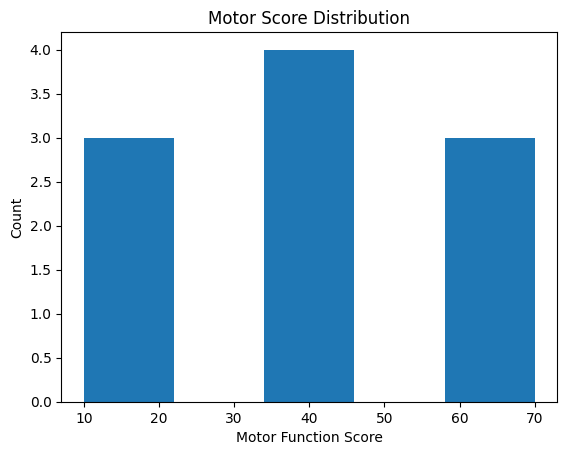

In [18]:
## Save Figures
plt.hist(df_cleaned["motor_score"], bins=5)
plt.xlabel("Motor Function Score")
plt.ylabel("Count")
plt.title("Motor Score Distribution")
plt.savefig("../results/figures/motor_score_distribution.png")
plt.show()


## Day 6
### Categorical Analysis and Group Comparisons

In [21]:
## Count SMA Types
df_cleaned["sma_type"].value_counts()


sma_type
Type II     4
Type I      3
Type III    3
Name: count, dtype: int64

### SMA Type Distribution

Type II appears most frequently in this dataset,
followed by Type I and Type III.


In [22]:
## Severity Distribution
df_cleaned["severity"].value_counts()


severity
moderate    4
severe      3
mild        3
Name: count, dtype: int64

### Severity Distribution

Moderate severity cases are the most common,
with fewer severe and mild cases.


In [25]:
## Motor Score by SMA Type
df_cleaned.groupby("sma_type")["motor_score"].mean()


sma_type
Type I      12.333333
Type II     38.750000
Type III    67.666667
Name: motor_score, dtype: float64

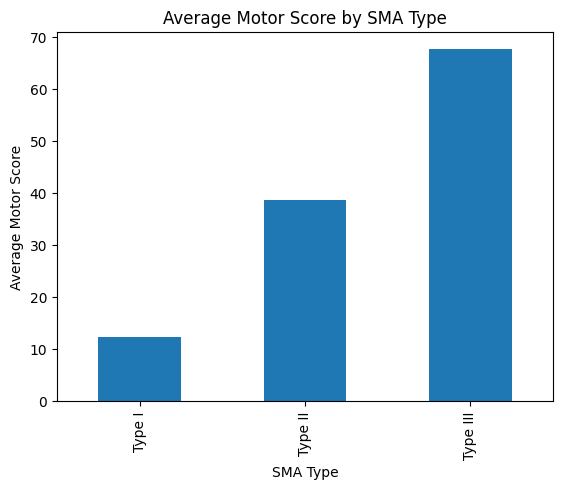

In [26]:

## Visalization
df_cleaned.groupby("sma_type")["motor_score"].mean().plot(kind="bar")
plt.xlabel("SMA Type")
plt.ylabel("Average Motor Score")
plt.title("Average Motor Score by SMA Type")
plt.show()



### Group Comparison Insight

Patients with Type III SMA have higher average motor scores,
indicating milder functional impairment compared to Type I and II.


In [27]:
## SMN2 Copies vs Severity
df_cleaned.groupby("severity")["smn2_copies"].mean()


severity
mild        4.0
moderate    3.0
severe      2.0
Name: smn2_copies, dtype: float64

### Genetic Insight

Higher SMN2 copy numbers are associated with milder disease severity,
supporting known biological understanding of SMA.


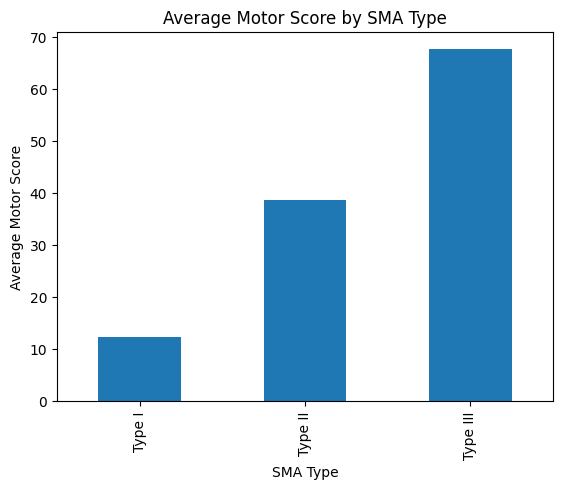

In [28]:
## Saving the plot
df_cleaned.groupby("sma_type")["motor_score"].mean().plot(kind="bar")
plt.xlabel("SMA Type")
plt.ylabel("Average Motor Score")
plt.title("Average Motor Score by SMA Type")
plt.savefig("../results/figures/motor_score_by_sma_type.png")
plt.show()
